# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

from sklearn.preprocessing import (KBinsDiscretizer, StandardScaler, OneHotEncoder)

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.datasets import load_digits, fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
countries = pd.read_csv("https://raw.githubusercontent.com/luislauriano/AceleraDev_DataScience/master/data/countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
countries.head(3)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"


In [6]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density          object
Coastline_ratio      object
Net_migration        object
Infant_mortality     object
GDP                 float64
Literacy             object
Phones_per_1000      object
Arable               object
Crops                object
Other                object
Climate              object
Birthrate            object
Deathrate            object
Agriculture          object
Industry             object
Service              object
dtype: object

In [7]:
#Quais variaveis estao usando vírgula como separador decimal e estão codificadas como strings?
countries.iloc[0:,4:].head(3)

,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"


In [8]:
# Retirando a virgula (Alterando o separador decimal) e convertendo as variáveis em numéricas:
countries.iloc[0:, 4:] = countries.iloc[0:, 4:].replace(',', '.', regex=True).astype(float)

In [9]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

In [10]:
#Removendo os espaços presentes no começo e final das colunas de texto:
countries['Region'] = countries['Region'].str.strip()
countries['Country'] = countries['Country'].str.strip()

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [11]:
def q1():
    return sorted(list(countries['Region'].unique()))

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

Discretizar é separar em intervalos contínuos uma variável numérica. Isso pode ser útil para converter uma variável numérica em categórica, quando o valor exato numérico não for tão importante quanto o intervalo onde ele se encontra.

In [19]:
def q2():
    # Configurando o discretizador:
    discretize = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

    # Ajustando e transformando os dados:
    answer = discretize.fit_transform(countries[['Pop_density']])

    # Número de países que estão acima de 90º percentil:
    return int((answer >= 9).sum())

A Discretização é o processo pelo qual podemos transformar variáveis contínuas em uma forma discreta. Os dados contínuos são medidos, enquanto os dados discretos são contados.

* n_bins: Número de intervalos.
* encode='ordinal': Retorna o resultado codificado como um valor inteiro.
* strategy='quantile': Cada bins tem aproximadamente o mesmo número de amostras.

Para mais detalhes sobre essas informações consulte a documentação.

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [32]:
def q3():
    return pd.get_dummies(countries[['Region','Climate']]).shape[1] + countries[['Climate']].nunique()[0]

Quando usamos o get_dummies() o pandas por padrão executa a codificação one-hot encoding.

O one-hot encoding é um processo de engenharia de recursos pelo qual variáveis ​​categóricas são convertidas em um formato que pode ser fornecido aos algoritmos de ML para fazer um trabalho melhor na previsão.

Também poderiamos fazer dessa forma:

In [33]:
countries["Region"].nunique() + len(countries["Climate"].unique())

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [34]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [35]:
def q4():
    # Selecionando só as colunas numéricas:
    num_features = countries.select_dtypes(exclude=['object'])

    # Lista de etapas do pipeline:
    pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")), 
        ('scale', StandardScaler())])

    # Aplicando o pipeline somente nas variáveis dos tipos especificados:
    pipe.fit(num_features)

    # Aplicando o mesmo pipeline nos dados test_country:
    pipe_transform = pipe.transform([test_country[2:]])

    # Valor da variável Arable após o pipeline:
    answer = pipe_transform[:, num_features.columns.get_loc("Arable")]
    return np.round(answer.item(), 3)

Lembrar-se sempre que apenas os dados de TESTE devem ser transformados!


## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

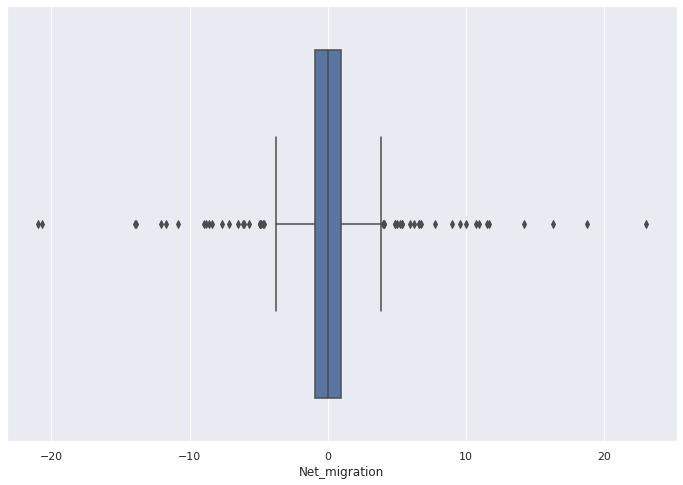

In [37]:
sns.boxplot(countries['Net_migration'])

In [41]:
Q1 = countries['Net_migration'].quantile(0.25)
Q3 = countries['Net_migration'].quantile(0.75)

IQR= Q3- Q1
IQR

1.9249999999999998

In [43]:
#Limite inferior
out_low = Q1 - 1.5 * IQR

#Limite superior
out_high = Q3 + 1.5 * IQR

In [49]:
outliers_abaixo = (countries["Net_migration"] < out_low)
outliers_acima = (countries["Net_migration"] > out_high).sum()

array([False,  True])

In [51]:
def q5():
  #Definindo os quartis
  Q1 = countries['Net_migration'].quantile(0.25)
  Q3 = countries['Net_migration'].quantile(0.75)
  
  #Intervalo interquartil
  IQR= Q3- Q1

  #Limite inferior e superior
  out_low = Q1 - 1.5 * IQR
  out_high = Q3 + 1.5 * IQR

  #Outliers acima e abaixo
  outliers_abaixo = (countries["Net_migration"] < out_low).sum()
  outliers_acima = (countries["Net_migration"] > out_high).sum()

  # Número de outliers:
  return int(outliers_abaixo), int(outliers_acima),False

Apenas identificar a quantidade e a presença de outliers não é suficiente se queremos remover os outliers, por isso antes de removê-los devemos fazer uma análise mais profunda.

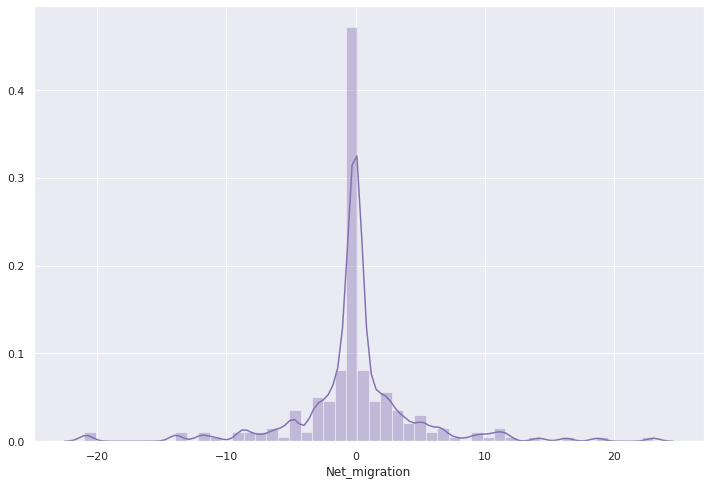

In [52]:
#Visualização utilizando histograma:
sns.distplot(countries['Net_migration'], color='m');

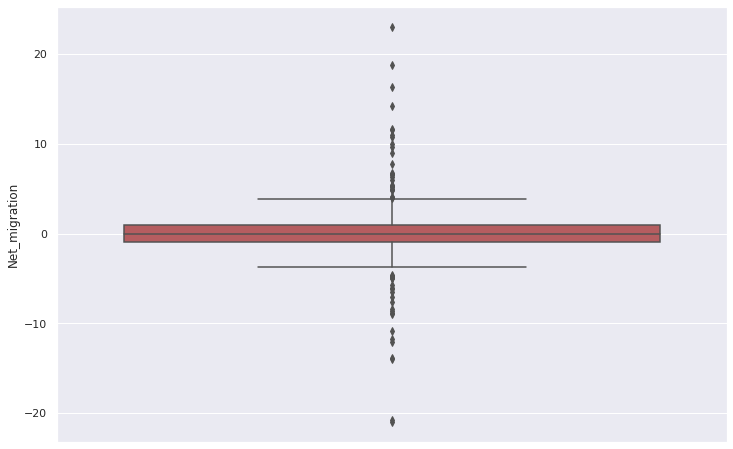

In [54]:
#Visualização utilizando boxplot:
sns.boxplot(countries['Net_migration'], orient='vertical',color='r');

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [57]:
# Carregando as categorias e o dataset newsgroups:
categories = ["sci.electronics", "comp.graphics", "rec.motorcycles"]
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [58]:
def q6():
  
    # Iniciando o CountVectorizer:
    count_vectorizer = CountVectorizer()

    # Ajustando e transformando os dados:
    newsgroups_counts = count_vectorizer.fit_transform(newsgroup.data)

    # Número de vezes que a palavra phone aparece no corpus:
    return int(newsgroups_counts[:, count_vectorizer.vocabulary_['phone']].sum())

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [59]:
def q7():
    # Instanciado o TfidfVectorizer:
    tfidf_vectorizer = TfidfVectorizer()

    # Ajustando e transformando os dados:
    newsgroups_counts = tfidf_vectorizer.fit_transform(newsgroup.data)

    # TF-IDF da palavra phone:
    return np.round(float((newsgroups_counts[:, tfidf_vectorizer.vocabulary_['phone']].sum())),3)


O TF-IDF é usado para pontuar a importância de uma palavra em um documento com base na frequência com que ela apareceu nesse documento.

* TF = (número de vezes que o termo aparece em um documento) / (número de termos no documento)

* IDF = log (N / n), em que N é o número de documentos e n é o número de documentos em que um termo apareceu.